# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [6]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(rc={'figure.figsize':(8,6)})

zillow_data = pd.read_csv('zillow_data.csv')
zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [7]:
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
zillow_data.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


### Understand the data set
1. What type of city, metro, and state there is?
2. Should you consider just looking into one state or take it all in
3. Figure out what size rank means 
4. Region name vs region id

In [9]:
# When looking into this dataset surprisingly you can see Hawaii
zillow_data.State.value_counts().to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, CA to VT
Data columns (total 1 columns):
State    51 non-null int64
dtypes: int64(1)
memory usage: 816.0+ bytes


In [10]:
# Since my home town is in NJ I will try and focus on Nj 
NJ_zillow_data = zillow_data.loc[(zillow_data.State == 'NJ') & (zillow_data.CountyName == 'Hudson')]
NJ_zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300
214,60599,7093,West New York,NJ,New York,Hudson,215,131700.0,131900.0,132100.0,...,361200,368200,376800,386200,392900,395100,395500,399400,407000,412700
319,60594,7087,Union City,NJ,New York,Hudson,320,127300.0,127000.0,126700.0,...,367000,377500,386000,394700,403700,410500,415500,424000,437400,448900


In [11]:
NJ_zillow_data.City.value_counts()

Jersey City      4
Kearny           1
Union City       1
Bayonne          1
Hoboken          1
Harrison         1
West New York    1
Weehawken        1
Secaucus         1
North Bergen     1
Name: City, dtype: int64

In [13]:
zillow_data.iloc[:, 7::]

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,91300.0,90900.0,90500.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,58700.0,59100.0,59500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,200700.0,202600.0,204900.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


# Step 2: Data Preprocessing

In [14]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [15]:
get_datetimes(zillow_data.iloc[:, 7::])

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

In [16]:
df_time = get_datetimes(zillow_data.iloc[:, 7::])

# Step 3: EDA and Visualization

In [17]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'matplotlib' is not defined

# Step 4: Reshape from Wide to Long Format

In [4]:
def melt_data(df):
    #id_vars keeps all columns you want to remain intake, var_name 
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [76]:
def town_zd(town):
    x= melt_data(NJ_zillow_data.loc[(NJ_zillow_data.City == town)])
    x.set_index('time', inplace=True)
    
    if len(x.RegionName.unique()) == 1:
        x= x.drop(['City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], axis=1)
        return x     
    else:
        for i in range(0,len(x.RegionName.unique())):
            variables[i]= x.loc[(x.RegionName == x.RegionName[i])]
            variables[i]= variables[i].drop(['City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], axis=1)
        return variables
        
    

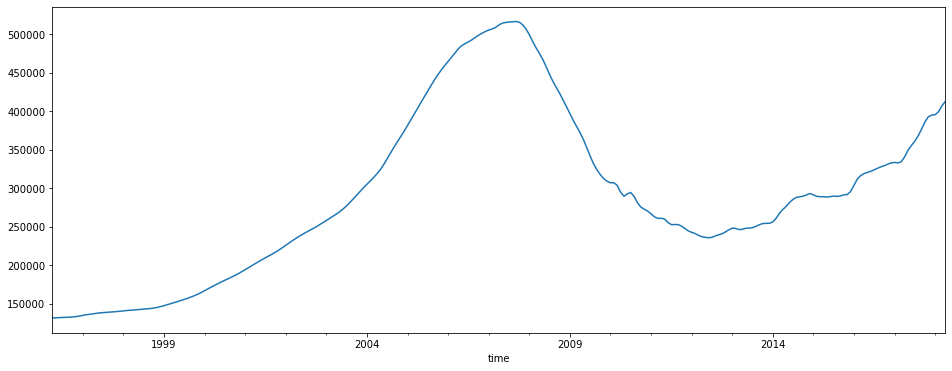

In [79]:
town_zd("West New York")['value'].plot(figsize = (16,6))

In [81]:
from datetime import datetime, timedelta
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

train_data = town_zd("West New York")['value'][:train_end]
test_data = town_zd("West New York")['value'][train_end + timedelta(days=1):test_end]

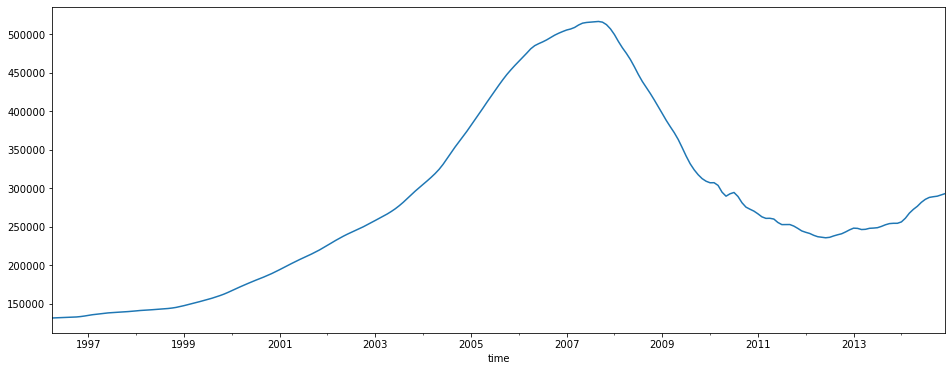

In [83]:
train_data.plot(figsize = (16,6))

In [28]:
wny_zd = wny_zd[:-4]
uc_zd = uc_zd[:-4]
nb_zd = nb_zd[:-4]
wh_zd = wh_zd[:-4]
seca_zd = seca_zd[:-4]

In [29]:
wny_zd = wny_zd[9:]
uc_zd = uc_zd[9:]
nb_zd = nb_zd[9:]
wh_zd = wh_zd[9:]
seca_zd = seca_zd[9:]

In [30]:
wny_zd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1997-01-01 to 2017-12-01
Data columns (total 1 columns):
value    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


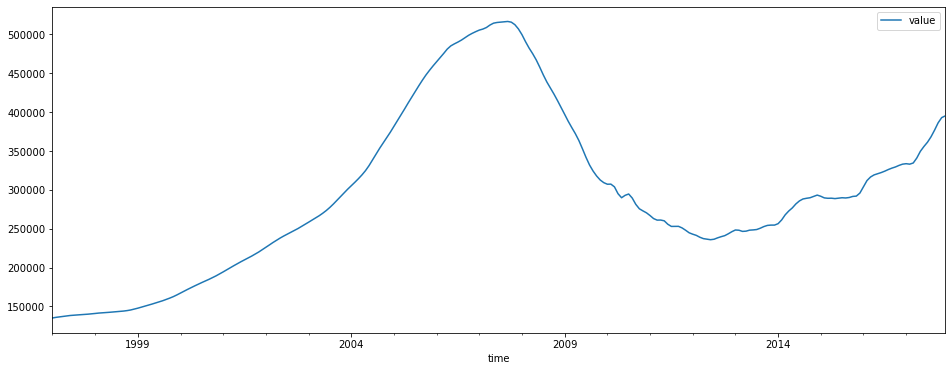

In [31]:
# Draw a line plot using wny_zd and .plot method()
wny_zd.plot(figsize = (16,6))

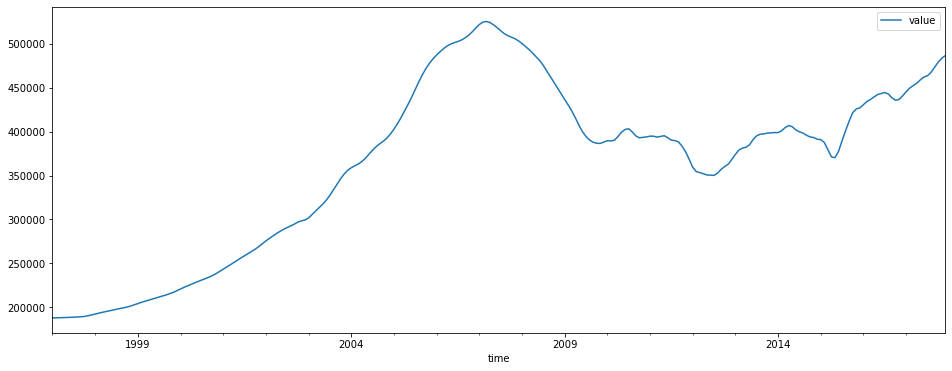

In [32]:
seca_zd.plot(figsize = (16,6))

In [33]:
# grouping and visualizing time series data
wny_zd.groupby(pd.Grouper(freq ='A'))

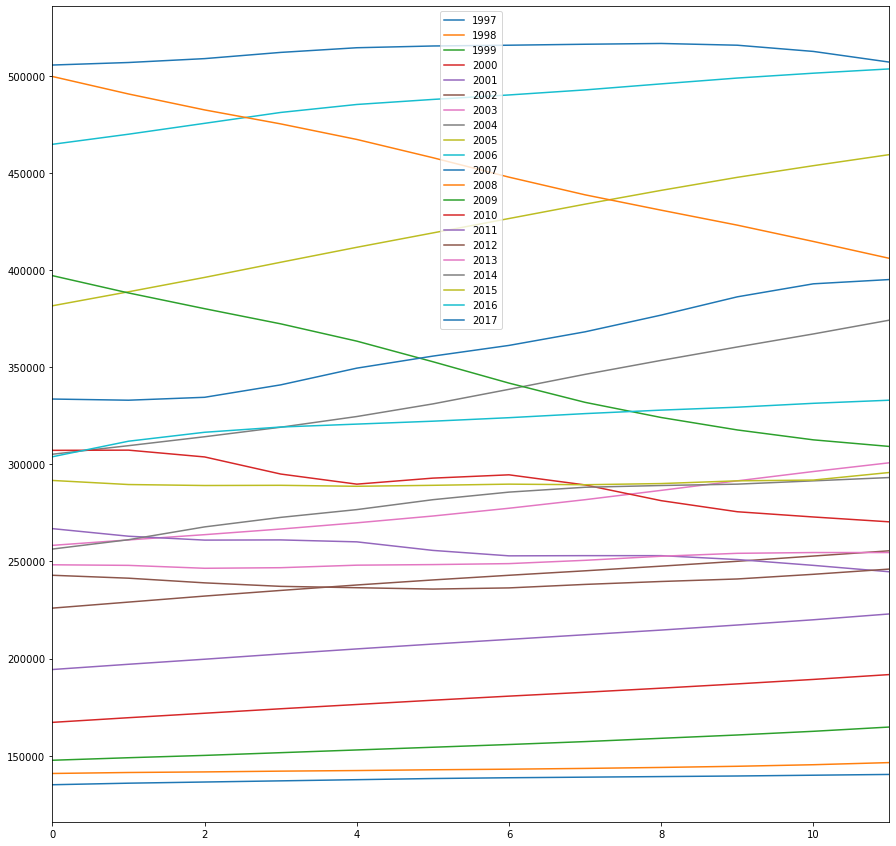

In [34]:
# Create a new df and store yearly values in columns
wny_annual = pd.DataFrame()

for yr, group in wny_zd.groupby(pd.Grouper(freq ='A')):
    wny_annual[yr.year] = group.values.ravel()
    
#Plot the yearly groups as subplots
wny_annual.plot(figsize = (15,15), subplots=False, legend=True);

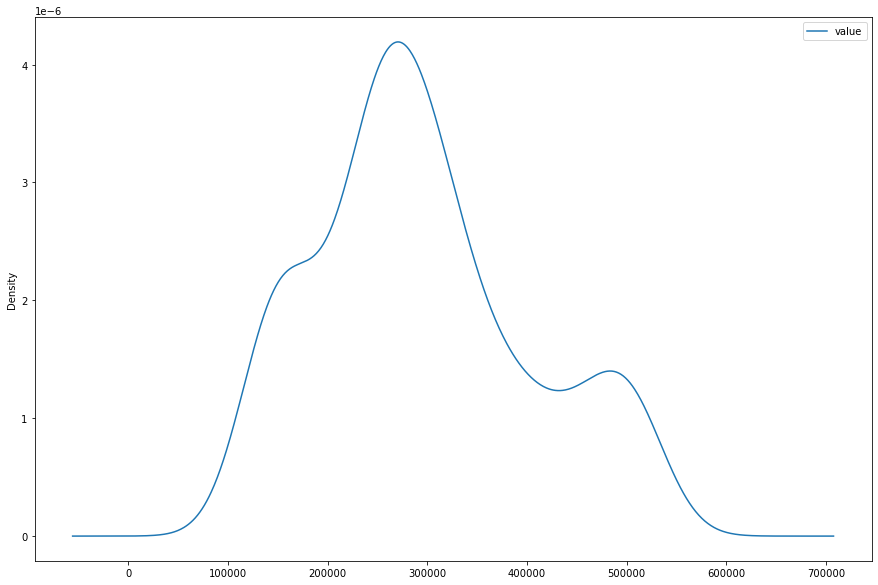

In [35]:
# Plot a density plot for wny_zd

wny_zd.plot(kind='kde', figsize = (15,10))

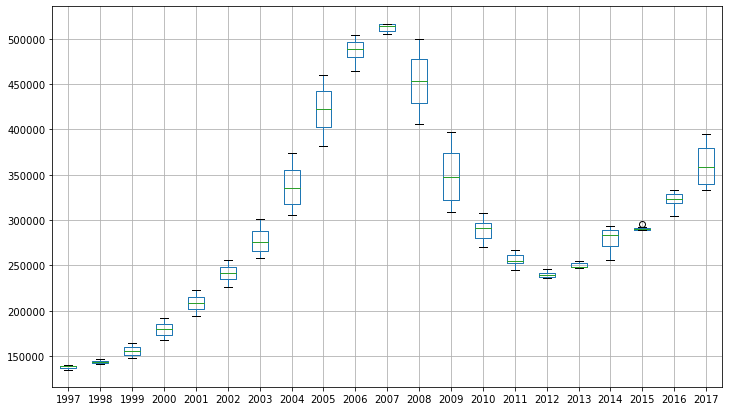

In [36]:
wny_annual.boxplot(figsize = (12,7))

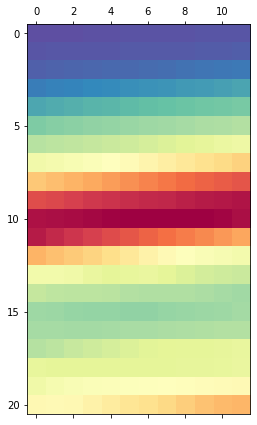

In [37]:
year_matrix = wny_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)

# Test for tends 
1. Visualizing rolling mean and std
2. The Dickey-Fuller Test

In [86]:
def stationarity_check(df):
    # Create rolling mean and std to test for trends
    roll_mean = df.rolling(window=8, center=False).mean()
    roll_std = df.rolling(window=8, center=False).std()
    
    # The Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(df)
    # Plot rolling statistics
    fig = plt.figure(figsize=(12,7))
    plt.plot(df, color = 'blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Print Dickey_fuller test results
    print('Results of the Dickey-Fuller Test: \n')

    #Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return None

In [84]:
wny_zd = town_zd("West New York")['value']

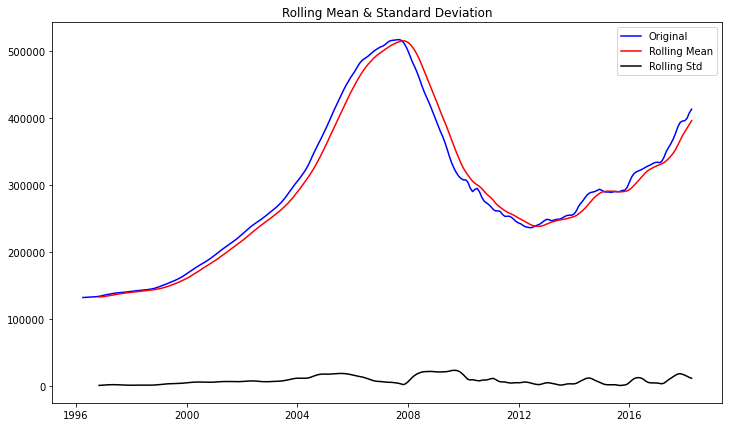

Results of the Dickey-Fuller Test: 

Test Statistic            -2.885980
p-value                    0.047003
#lags Used                13.000000
Number of Observation    251.000000
Critical Value (1%)       -3.456674
Critical Value (5%)       -2.873125
Critical Value (10%)      -2.572944
dtype: float64


In [87]:
stationarity_check(wny_zd)

The Dickey-Fuller test statisitic is not less than the Critical Value (1%). We can not reject the null hypothesis that the series is not stationary. The p-value is not below the strict 0.01 mark


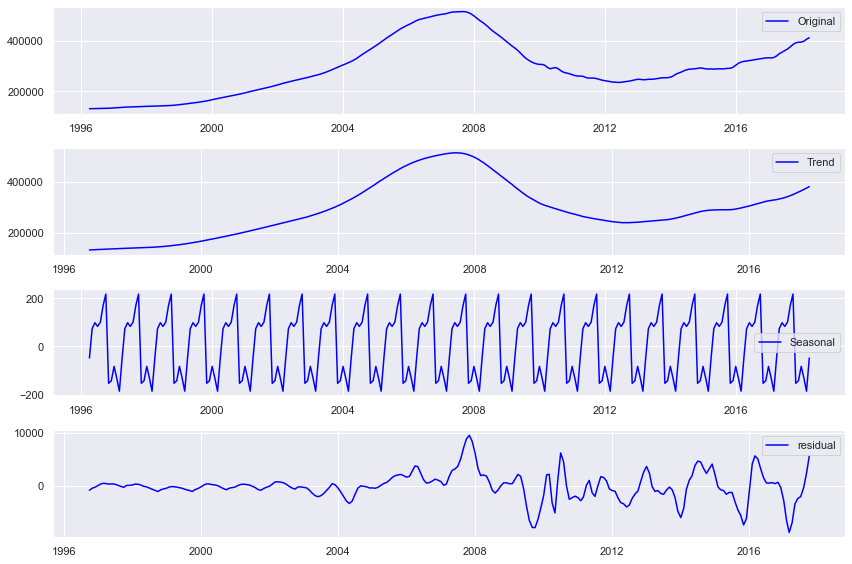

In [143]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(wny_zd)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_zd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

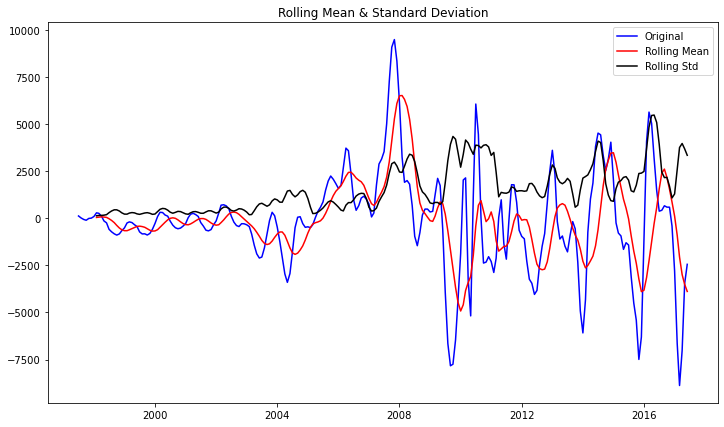

Results of the Dickey-Fuller Test: 

Test Statistic            -2.914719
p-value                    0.043663
#lags Used                11.000000
Number of Observation    228.000000
Critical Value (1%)       -3.459361
Critical Value (5%)       -2.874302
Critical Value (10%)      -2.573571
dtype: float64


In [41]:
#Drop missing values from residuals
wny_zd_decompose = residual
wny_zd_decompose.dropna(inplace=True)

# Check Stationarity
stationarity_check(wny_zd_decompose)

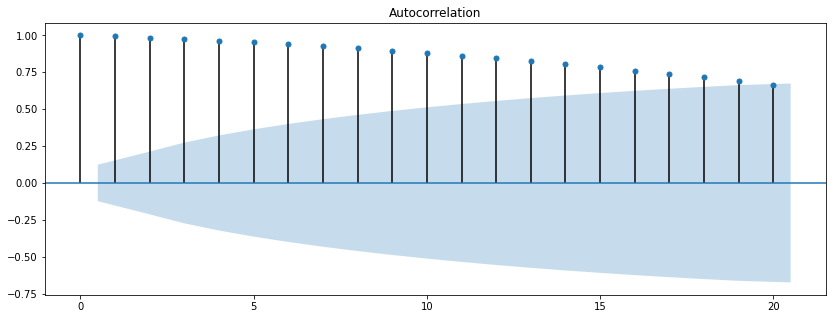

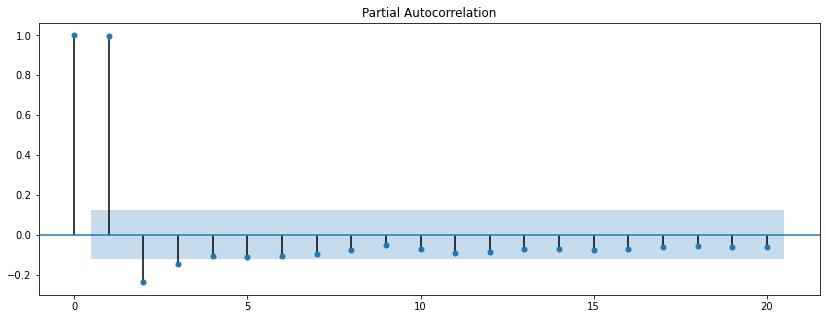

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14,5

plot_acf(wny_zd, lags=20);
plot_pacf(wny_zd, lags=20);

By examining these both plots you can see that the ACF plot is decaying and approaching to zero. As for the PACF, you see a siginificant spike at the first lag and decays after that. This analysis suggest the appropriate model to select is an AR(1)
- p = 1
- d = 0
- q = 0


# Rolling Forecast Origin

- In this method we are updating the model every month and predicting the following month

In [88]:
from datetime import datetime, timedelta
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

# Setting the train data to extend to 12-1-2014
train_data = town_zd("West New York")['value'][:train_end]

# Setting the test data to extend to 12-1-2017
test_data = town_zd("West New York")['value'][train_end + timedelta(days=1):test_end]

# Setting the Index for 2 years
#index_7_years = pd.date_range()

In [89]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from time import time

#create the model
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = town_zd("West New York")['value'][:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(1,0,0))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]
    

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or 

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so

In [91]:
residuals_rolling = test_data - predictions_rolling

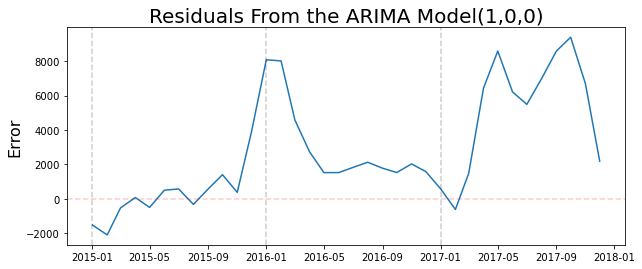

In [92]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(1,0,0)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Typically you want to see that your residuals are fluccuating at zero. However, what you have here a an increasing residual error this suggest that the time series is not stationary. But I will continue to use this model to make predictions for educational purposes and a good starting point.

Text(0, 0.5, 'Value')

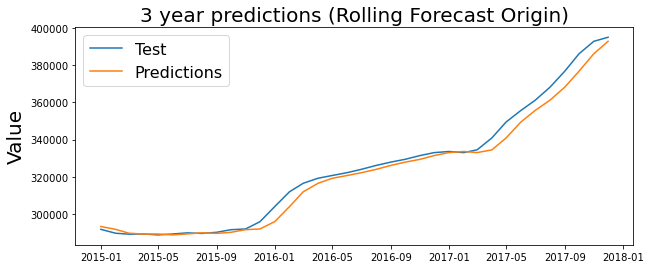

In [93]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test', 'Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)



print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

# 1 year prediction

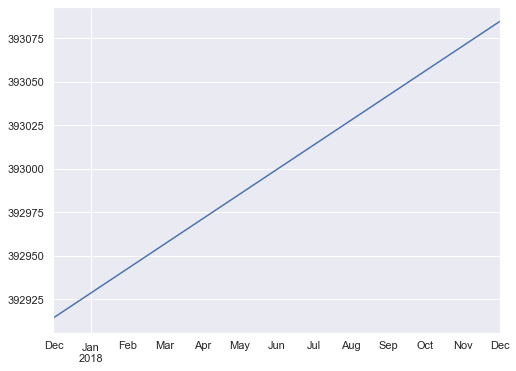

In [124]:
# predictions
future_start = "2017-12-01"
future_end = "2018-12-01"

future = model_fit.predict(start = future_start, end = future_end)

future.plot()

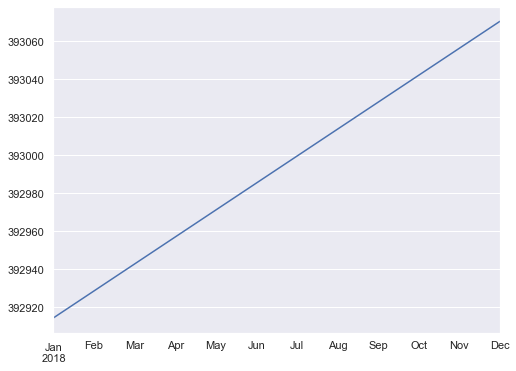

In [125]:
# forecast
index_12_months = pd.date_range('2018-01-01', freq='MS', periods = 12)

fcast1 = model_fit.forecast(12)[0]

fcast1 = pd.Series(fcast1, index=index_12_months)

fcast1.plot()

Text(0, 0.5, 'Value')

<Figure size 720x288 with 0 Axes>

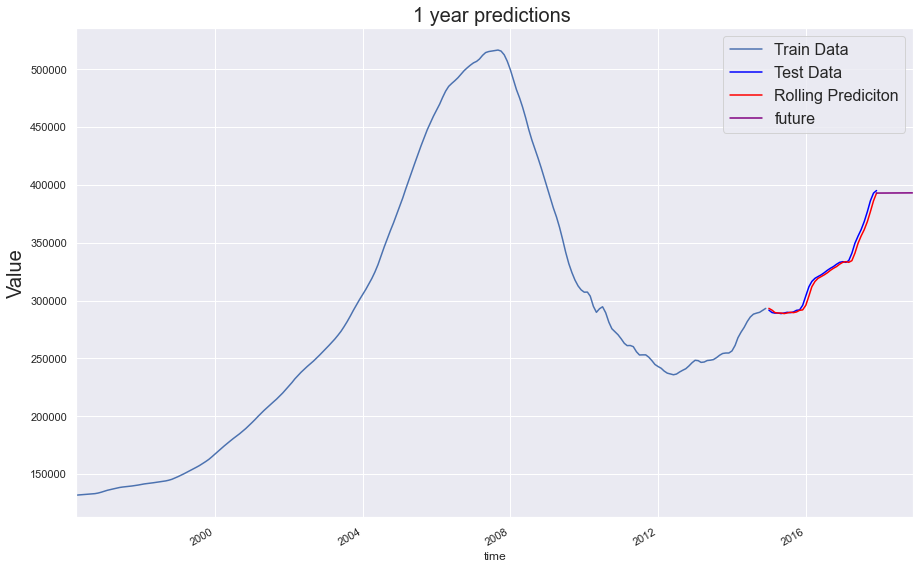

In [123]:
plt.figure(figsize=(10,4))


# Ploting the predicitons
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(data = train_data)

test_data.plot(ax=ax, color='blue', legend=True)
predictions_rolling.plot(ax=ax, color='red', legend=True)
future.plot(ax=ax, color='purple', legend=True)
#fcast1.plot(ax=ax, color='orange', legend=True)

plt.legend(('Train Data', 'Test Data', 'Rolling Prediciton', 'future', 'fcast1'), fontsize=16)

plt.title('1 year predictions ', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [52]:
future[0]

392914.2311387282

In [53]:
future[-1]

393084.94982382713

In [54]:
test_data.value[-1]

395100.0

### Weighted rolling mean and Differencing then seasonal_decompose to see which is a better results

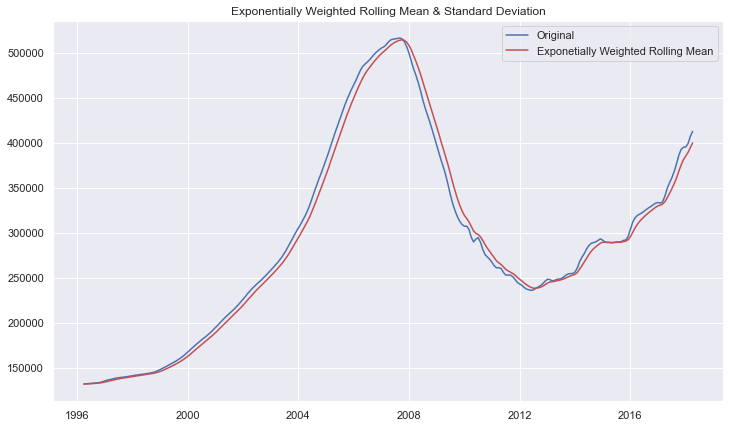

In [132]:
# Use Pandas ewm() to calculate Expontential Weighted Moving Average
exp_roll_mean = wny_zd.ewm(halflife=2).mean()

#Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(wny_zd, color='b', label='Original')
mean =plt.plot(exp_roll_mean, color='r', label='Exponetially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [133]:
# Subtact the moving avg from original data
data_minus_exp_roll_mean = wny_zd - exp_roll_mean
data_minus_exp_roll_mean.head()

time
1996-04-01      0.000000
1996-05-01     82.842712
1996-06-01    154.691816
1996-07-01    216.176046
1996-08-01    268.105479
Name: value, dtype: float64

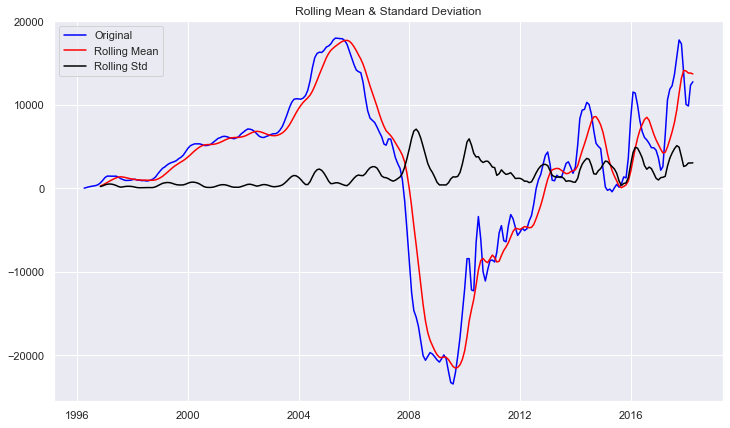

Results of the Dickey-Fuller Test: 

Test Statistic            -2.380493
p-value                    0.147318
#lags Used                15.000000
Number of Observation    249.000000
Critical Value (1%)       -3.456888
Critical Value (5%)       -2.873219
Critical Value (10%)      -2.572994
dtype: float64


In [134]:
stationarity_check(data_minus_exp_roll_mean)

**When subtracting the exponetial rolling mean the p-value increase to about 13%**

## Differencing wiht a Period of 1

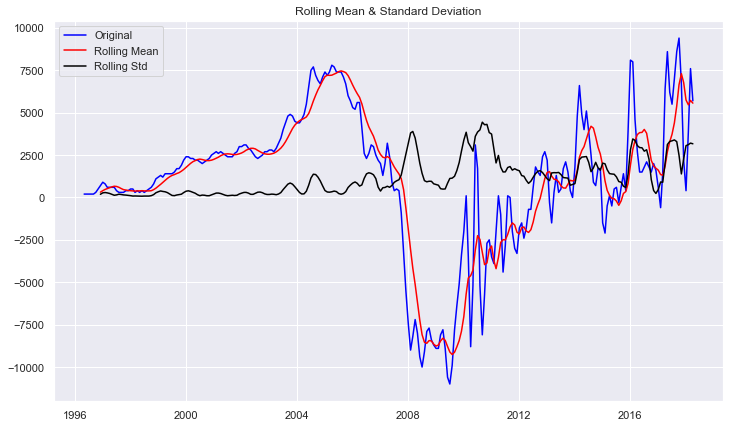

Results of the Dickey-Fuller Test: 

Test Statistic            -1.692786
p-value                    0.434833
#lags Used                15.000000
Number of Observation    248.000000
Critical Value (1%)       -3.456996
Critical Value (5%)       -2.873266
Critical Value (10%)      -2.573019
dtype: float64


In [136]:
data_diff = wny_zd.diff(periods=1)
data_diff.isna().sum()
data_diff.dropna(inplace=True)
stationarity_check(data_diff)

# Differencing with period 2

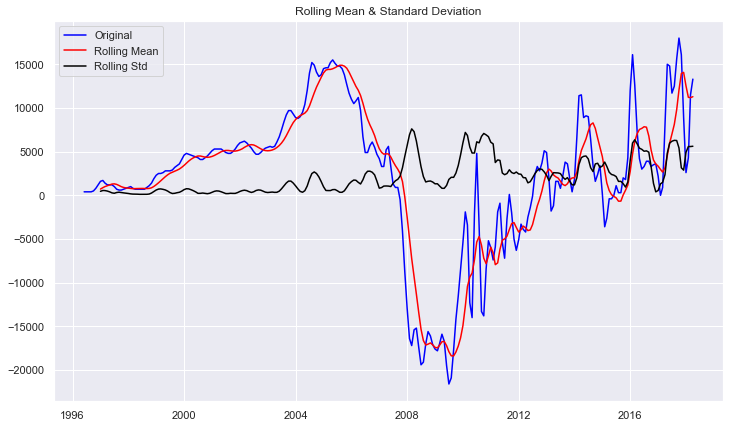

Results of the Dickey-Fuller Test: 

Test Statistic            -1.675594
p-value                    0.443729
#lags Used                10.000000
Number of Observation    252.000000
Critical Value (1%)       -3.456569
Critical Value (5%)       -2.873079
Critical Value (10%)      -2.572919
dtype: float64


In [139]:
data_diff_p2 = wny_zd.diff(periods=2)
data_diff_p2.isna().sum()
data_diff_p2.dropna(inplace=True)
stationarity_check(data_diff_p2)

# Will try differencing with a period of 12

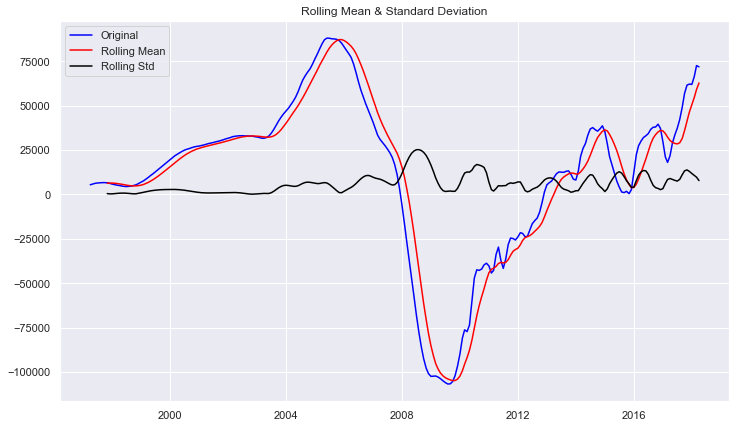

Results of the Dickey-Fuller Test: 

Test Statistic            -2.742561
p-value                    0.066958
#lags Used                16.000000
Number of Observation    236.000000
Critical Value (1%)       -3.458366
Critical Value (5%)       -2.873866
Critical Value (10%)      -2.573339
dtype: float64


In [147]:
data_diff_p12 = wny_zd.diff(periods=12)
data_diff_p12.isna().sum()
data_diff_p12.dropna(inplace=True)
stationarity_check(data_diff_p12)

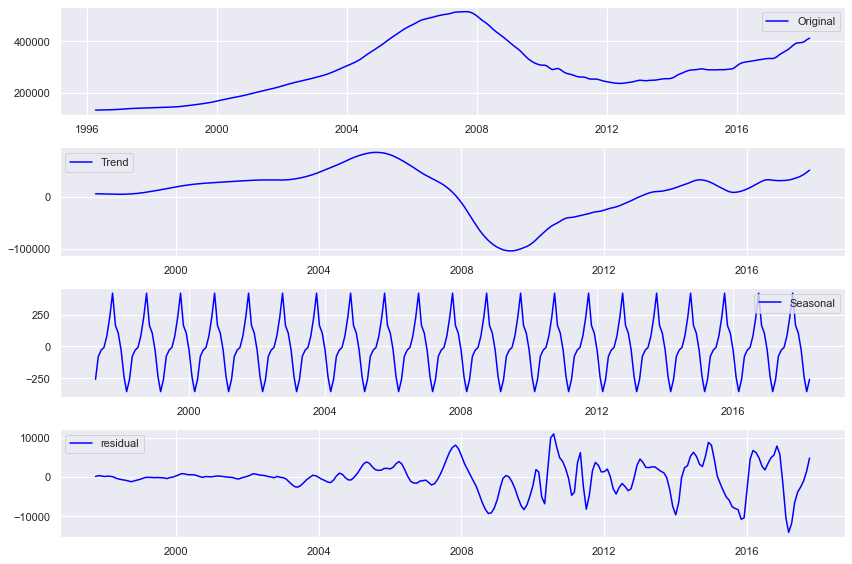

In [148]:
decomposition = seasonal_decompose(data_diff_p12)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(wny_zd, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

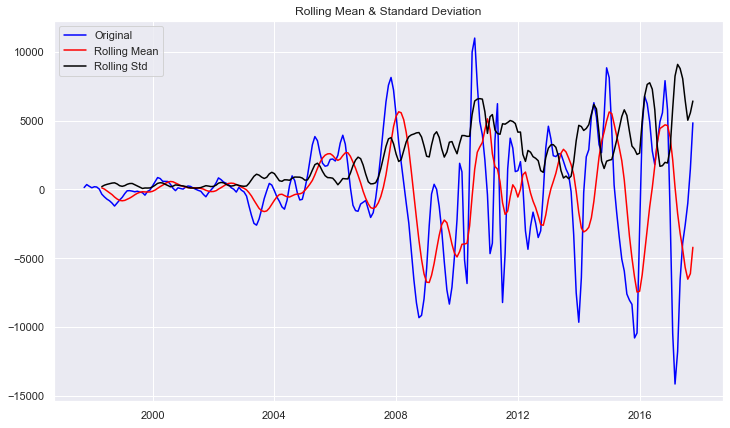

Results of the Dickey-Fuller Test: 

Test Statistic            -4.029965
p-value                    0.001261
#lags Used                11.000000
Number of Observation    229.000000
Critical Value (1%)       -3.459233
Critical Value (5%)       -2.874245
Critical Value (10%)      -2.573541
dtype: float64


In [149]:
#Drop missing values from residuals
wny_zd_decompose = residual
wny_zd_decompose.dropna(inplace=True)

# Check Stationarity
stationarity_check(wny_zd_decompose)

## Autocorrection and Partial Autocorrelation

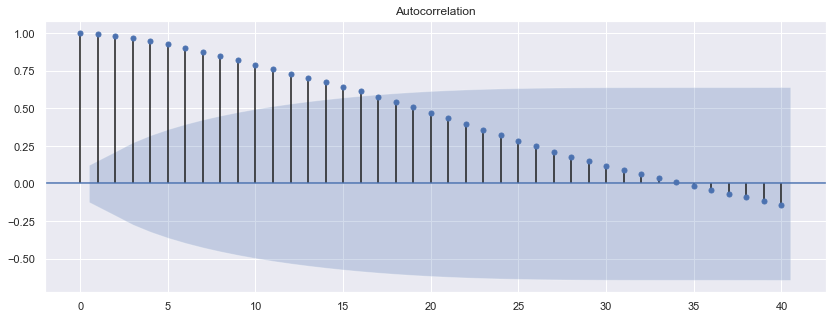

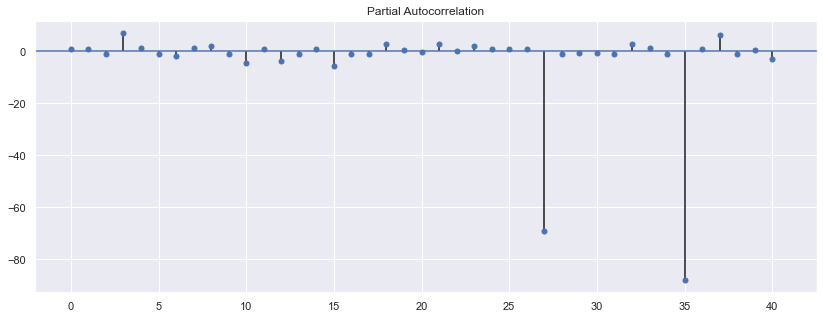

In [150]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14,5

plot_acf(data_diff_p12, lags=40);
plot_pacf(data_diff_p12, lags=40);

p = 4
d = 1
q = 0

In [294]:
pred_start = datetime(2017,1,1)
pred_end = datetime(2018,1,1)

# Setting the train data to extend to 12-1-2014
train_data_pred = town_zd("West New York")['value'][:pred_start]

# Setting the test data to extend to 12-1-2017
test_data_pred = town_zd("West New York")['value'][pred_start + timedelta(days=1):pred_end]

model_arima = ARIMA(train_data_pred, order=(4,1,0))
model_arima_fit = model_arima.fit()
pred_arima = model_arima_fit.predict(start = pred_start, end = pred_end, typ='levels')

In [295]:
residuals= test_data_pred - pred_arima

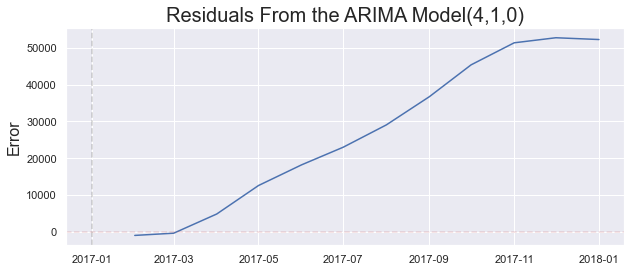

In [296]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals From the ARIMA Model(4,1,0)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2017,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Mean Absolute Percent Error: 0.0661
Root Mean Squared Error: 33459.827662980846


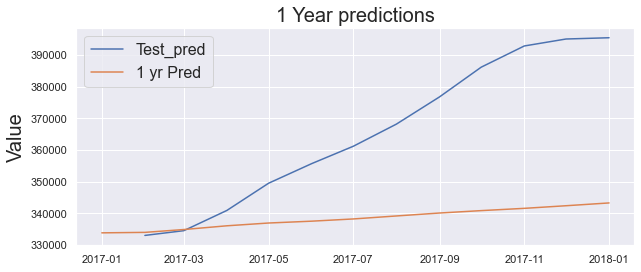

In [297]:
plt.figure(figsize=(10,4))

plt.plot(test_data_pred)
plt.plot(pred_arima)

plt.legend(('Test_pred','1 yr Pred'), fontsize=16)

plt.title('1 Year predictions', fontsize=20)
plt.ylabel('Value', fontsize=20)

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

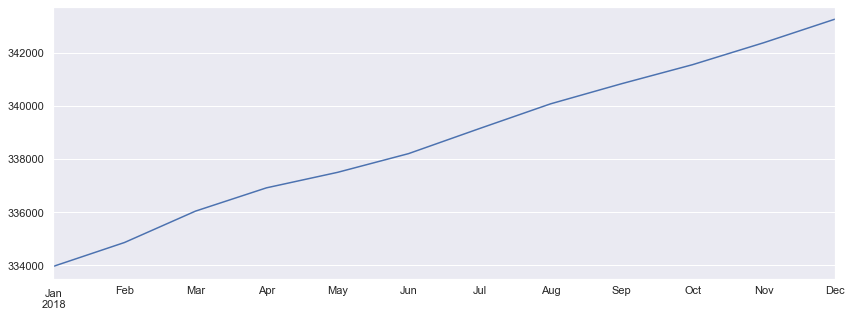

In [300]:
# forecast
index_12_months = pd.date_range('2018-01-01', freq='MS', periods = 12)

fcast1 = model_arima_fit.forecast(12)[0]

fcast1 = pd.Series(fcast1, index=index_12_months)

fcast1.plot()

Text(0, 0.5, 'Value')

<Figure size 720x288 with 0 Axes>

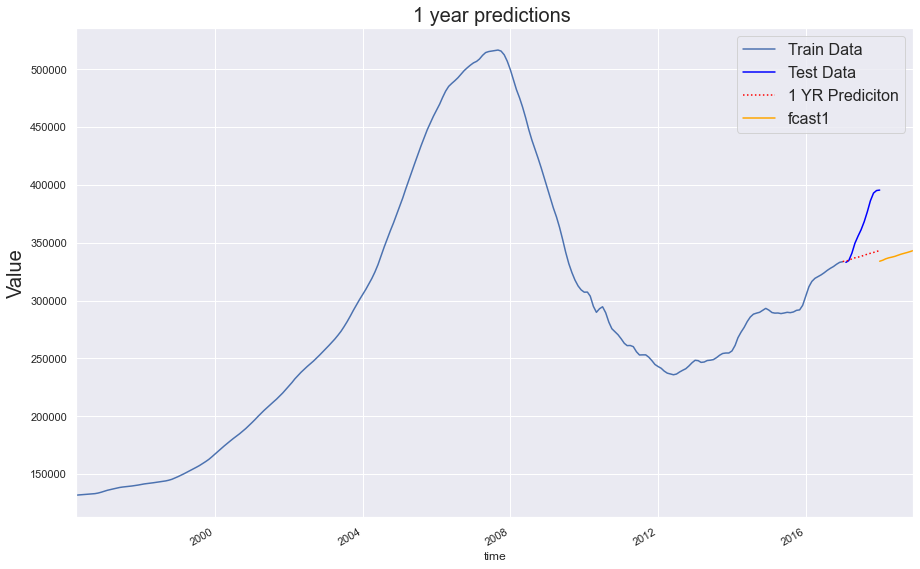

In [301]:
plt.figure(figsize=(10,4))


# Ploting the predicitons
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(data = train_data_pred)

test_data_pred.plot(ax=ax, color='blue', legend=True)
pred_arima.plot(ax=ax, color='red', linestyle=":", legend=True)
fcast1.plot(ax=ax, color='orange', legend=True)

plt.legend(('Train Data', 'Test Data', '1 YR Prediciton', 'fcast1'), fontsize=16)

plt.title('1 year predictions ', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [201]:
test_data_pred[-1]

395100.0

In [202]:
pred_arima[-1]

344941.4851946527

In [200]:
fcast1[0]

333813.1863757216

In [ ]:
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

# Setting the train data to extend to 12-1-2014
train_data = town_zd("West New York")['value'][:train_end]

# Setting the test data to extend to 12-1-2017
test_data = town_zd("West New York")['value'][train_end + timedelta(days=1):test_end]

In [152]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = town_zd("West New York")['value'][:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(4,1,0))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]
    

In [153]:
residuals_rolling = test_data - predictions_rolling

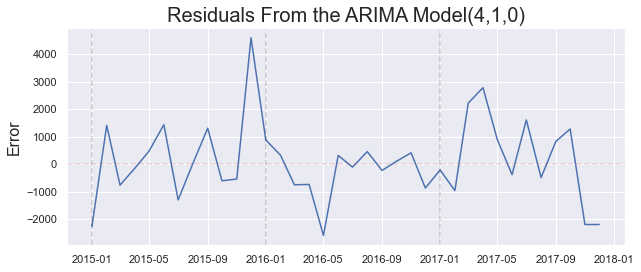

In [154]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(4,1,0)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Mean Absolute Percent Error: 0.0033
Root Mean Squared Error: 1438.9850443048251


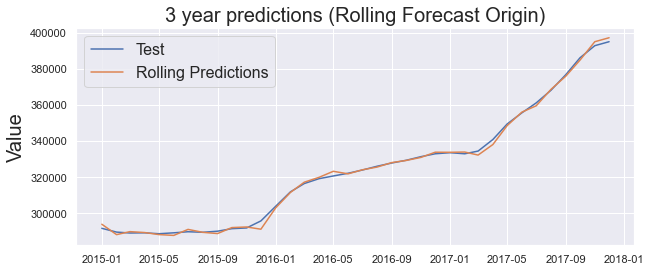

In [192]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test','Rolling Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data)),4))

print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

# 1 year prediction from after the rolling prediciton end date

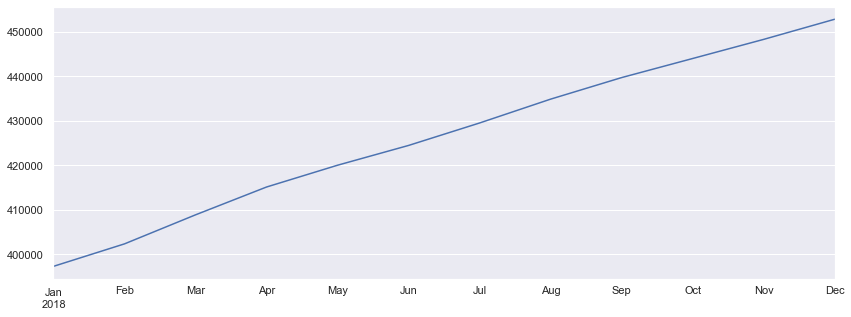

In [161]:
# forecast
index_12_months = pd.date_range('2018-01-01', freq='MS', periods = 12)

fcast1 = model_fit.forecast(12)[0]

fcast1 = pd.Series(fcast1, index=index_12_months)

fcast1.plot()

Text(0, 0.5, 'Value')

<Figure size 720x288 with 0 Axes>

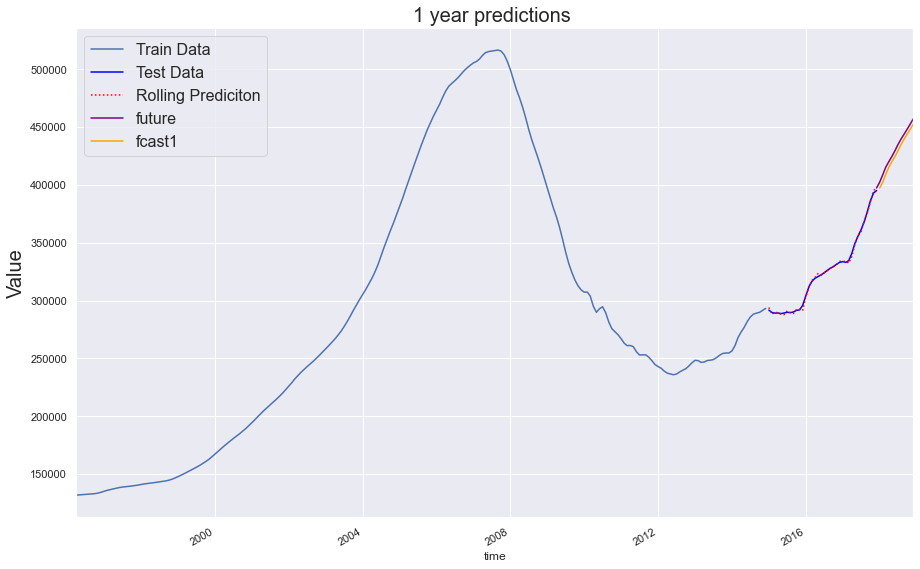

In [165]:
plt.figure(figsize=(10,4))


# Ploting the predicitons
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(data = train_data)

test_data.plot(ax=ax, color='blue', legend=True)
predictions_rolling.plot(ax=ax, color='red', linestyle=":", legend=True)
fcast1.plot(ax=ax, color='orange', legend=True)

plt.legend(('Train Data', 'Test Data', 'Rolling Prediciton', 'fcast1'), fontsize=16)

plt.title('1 year predictions ', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [166]:
future[0]

397294.671841302

In [167]:
future[-1]

457301.8247767432

In [169]:
test_data[-1]

395100.0

In [137]:
from pmdarima.arima.utils import ndiffs

ndiffs(wny_zd, test='adf')

2

In [170]:
data_diff_two = wny_zd.diff().diff()
data_diff_two.isna().sum()

2

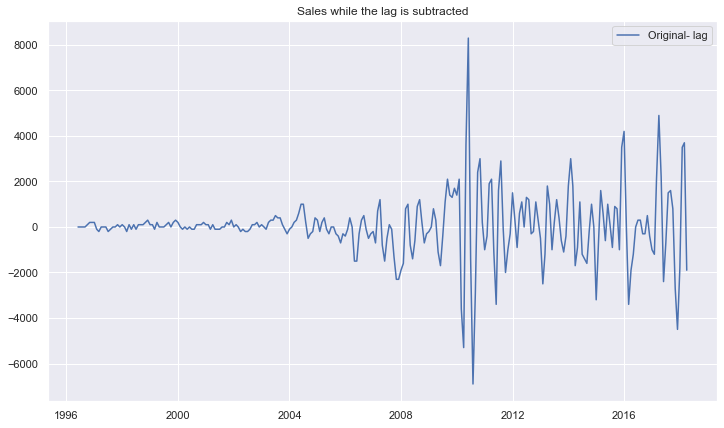

In [171]:
fig = plt.figure(figsize=(12,7))
data_diff_two.dropna(inplace=True)
plt.plot(data_diff_two, color='b', label='Original- lag')
plt.legend(loc='best')
plt.title('Sales while the lag is subtracted')
plt.show(block=False)

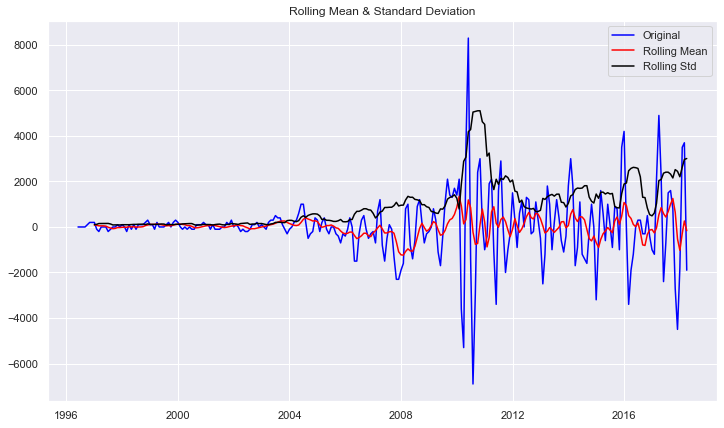

Results of the Dickey-Fuller Test: 

Test Statistic          -6.009962e+00
p-value                  1.582101e-07
#lags Used               1.100000e+01
Number of Observation    2.510000e+02
Critical Value (1%)     -3.456674e+00
Critical Value (5%)     -2.873125e+00
Critical Value (10%)    -2.572944e+00
dtype: float64


In [172]:
stationarity_check(data_diff_two)

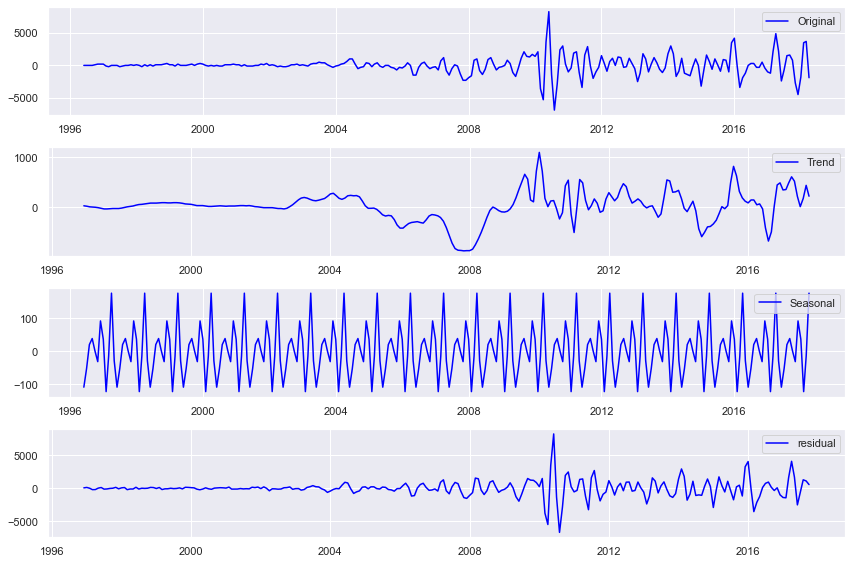

In [173]:
decomposition = seasonal_decompose(data_diff_two)

# Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data_diff_two, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual', color='blue')
plt.legend(loc='best')
plt.tight_layout()

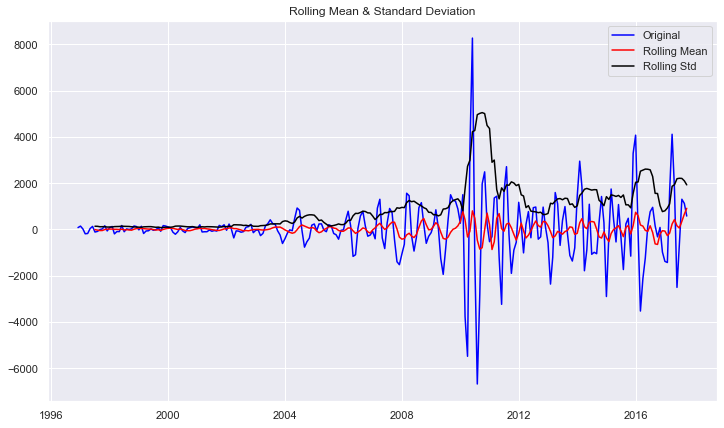

Results of the Dickey-Fuller Test: 

Test Statistic          -8.296936e+00
p-value                  4.115902e-13
#lags Used               1.600000e+01
Number of Observation    2.340000e+02
Critical Value (1%)     -3.458608e+00
Critical Value (5%)     -2.873972e+00
Critical Value (10%)    -2.573396e+00
dtype: float64


In [174]:
#Drop missing values from residuals
wny_zd_decompose = residual
wny_zd_decompose.dropna(inplace=True)

# Check Stationarity
stationarity_check(wny_zd_decompose)

# Autocorrection and Partial Autocorrelation

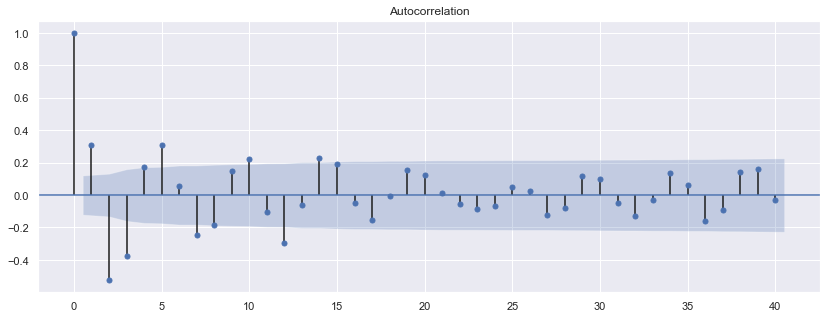

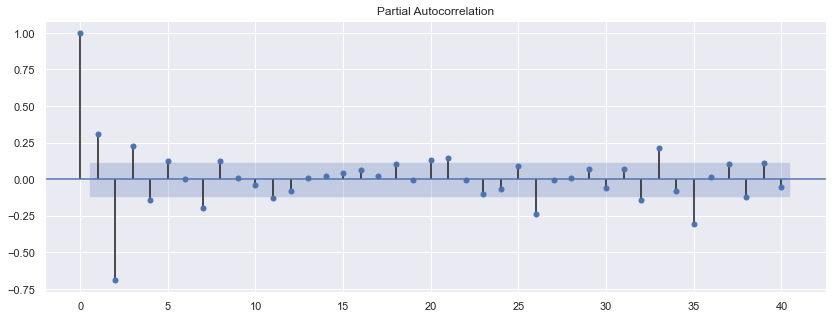

In [175]:
rcParams['figure.figsize'] = 14,5

plot_acf(data_diff_two, lags=40);
plot_pacf(data_diff_two, lags=40);

p= 0
d= 2
q= 1

In [204]:
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

# Setting the train data to extend to 12-1-2014
train_data = town_zd("West New York")['value'][:train_end]

# Setting the test data to extend to 12-1-2017
test_data = town_zd("West New York")['value'][train_end + timedelta(days=1):test_end]

In [205]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = town_zd("West New York")['value'][:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(0,2,1))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]
    

In [206]:
residuals_rolling = test_data - predictions_rolling

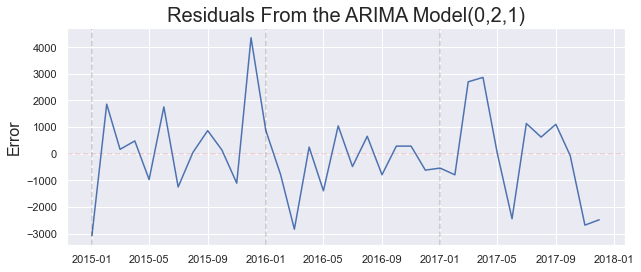

In [207]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(0,2,1)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Mean Absolute Percent Error: 0.0038
Root Mean Squared Error: 1605.3485062850523


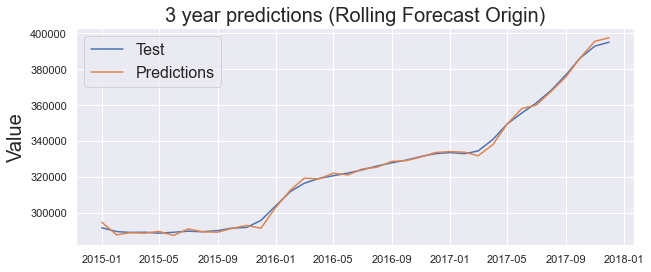

In [212]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test', 'Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)

print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data)),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

# Forcasting 1 Year Out

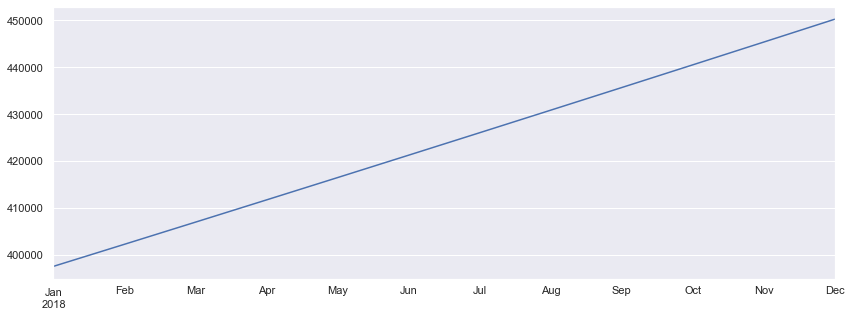

In [213]:
# forecast
index_12_months = pd.date_range('2018-01-01', freq='MS', periods = 12)

fcast1 = model_fit.forecast(12)[0]

fcast1 = pd.Series(fcast1, index=index_12_months)

fcast1.plot()

Text(0, 0.5, 'Value')

<Figure size 720x288 with 0 Axes>

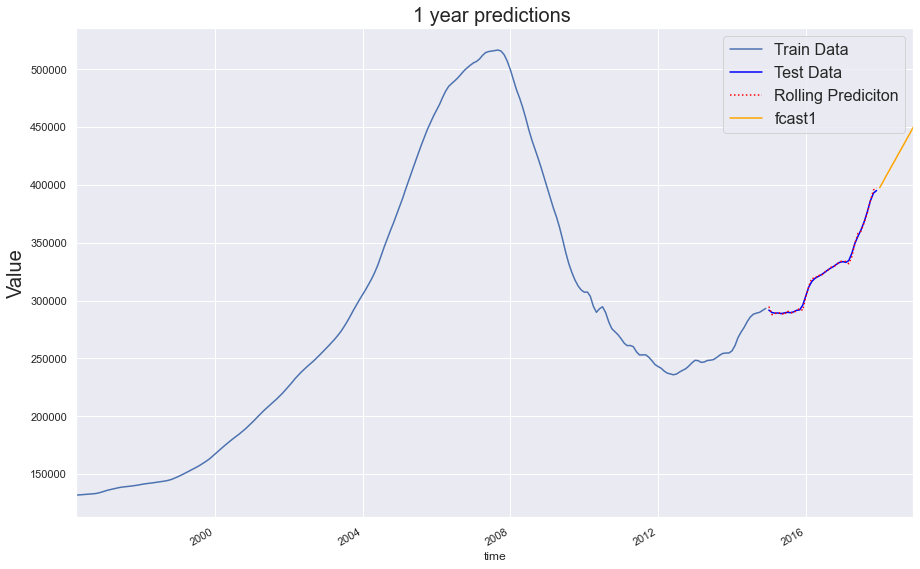

In [214]:
plt.figure(figsize=(10,4))


# Ploting the predicitons
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(data = train_data)

test_data.plot(ax=ax, color='blue', legend=True)
predictions_rolling.plot(ax=ax, color='red', linestyle=":", legend=True)
fcast1.plot(ax=ax, color='orange', legend=True)

plt.legend(('Train Data', 'Test Data', 'Rolling Prediciton', 'fcast1'), fontsize=16)

plt.title('1 year predictions ', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [101]:
future[0]

397583.9232936971

In [102]:
future[-1]

454948.21186822205

In [103]:
test_data.value[-1]

395100.0

In [243]:
import warnings
warnings.filterwarnings('ignore')
import itertools
d=range(2,3)
p=q=range(0,5)
pdq = list(itertools.product(p,d,q))

params=[]
aics=[]

for param in pdq:
    try:
        model_arima = ARIMA(train_data, order=param)
        model_arima_fit = model_arima.fit()
        params.append(param)
        aics.append(model_arima_fit.aic)
    except:
        continue
data_param = {'param':params,'AIC':aics}
df_param = pd.DataFrame(data_param)
df_param.sort_values(by='AIC').head()

,param,AIC
19,"(4, 2, 2)",3610.116951
20,"(4, 2, 3)",3611.003588
13,"(2, 2, 4)",3615.435072
10,"(2, 2, 1)",3619.944880
12,"(2, 2, 3)",3621.900231


Pick the combination that is the least complicated but with the lowest AIC: (2, 2, 1) 3619.9448799201546

In [309]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [311]:
conda install -c anaconda ephem


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\egust\anaconda3\envs\learn-env

  added / updated specs:
    - ephem


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         159 KB  anaconda
    ephem-3.7.7.1              |   py36he774522_0         749 KB  anaconda
    openssl-1.1.1h             |       he774522_0         5.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         6.6 MB

The following NEW packages will be INSTALLED:

  ephem              anaconda/win-64::ephem-3.7.7.1-py36he774522_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.12.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-20

In [2]:
conda install -c conda-forge pystan


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge fbprophet


Note: you may need to restart the kernel to use updated packages.


In [4]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [305]:
wny_zd_prophet = wny_zd.copy()
wny_zd_prophet.reset_index()
wny_zd_prophet.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(wny_zd_prophet)


NameError: name 'Prophet' is not defined

In [265]:
import itertools
d=range(2,3)
p=q=range(0,5)
pdq = list(itertools.product(p,d,q))

params=[]
aics=[]

for param in pdq:
    try:
        model_arima = ARIMA(train_data_pred, order=param)
        model_arima_fit = model_arima.fit()
        params.append(param)
        aics.append(model_arima_fit.aic)
    except:
        continue
data_param = {'param':params,'AIC':aics}
df_param = pd.DataFrame(data_param)
df_param.sort_values(by='AIC').head()

,param,AIC
23,"(4, 2, 4)",4221.526845
21,"(4, 2, 2)",4225.126951
22,"(4, 2, 3)",4227.117582
13,"(2, 2, 4)",4228.946408
18,"(3, 2, 4)",4229.745254


In [262]:
##### Option 2 : Auto ARIMA
import pmdarima as pm
index_12_months = pd.date_range('2017-01-01', freq='MS', periods = 12)

# Running an auto ARIMA
auto_arima_model = pm.auto_arima(train_data_pred, seasonal=True, m=1)

# make your forecast
fcast2 = auto_arima_model.predict(12)[0]
fcast2 = pd.Series(fcast2, index=index_12_months)


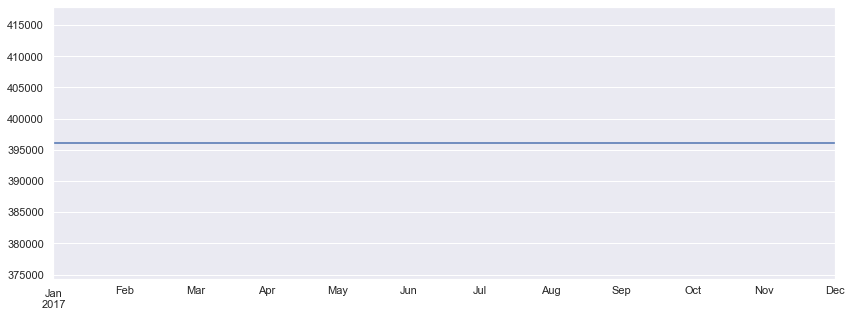

In [263]:
fcast2.plot()

Text(0, 0.5, 'Value')

<Figure size 720x288 with 0 Axes>

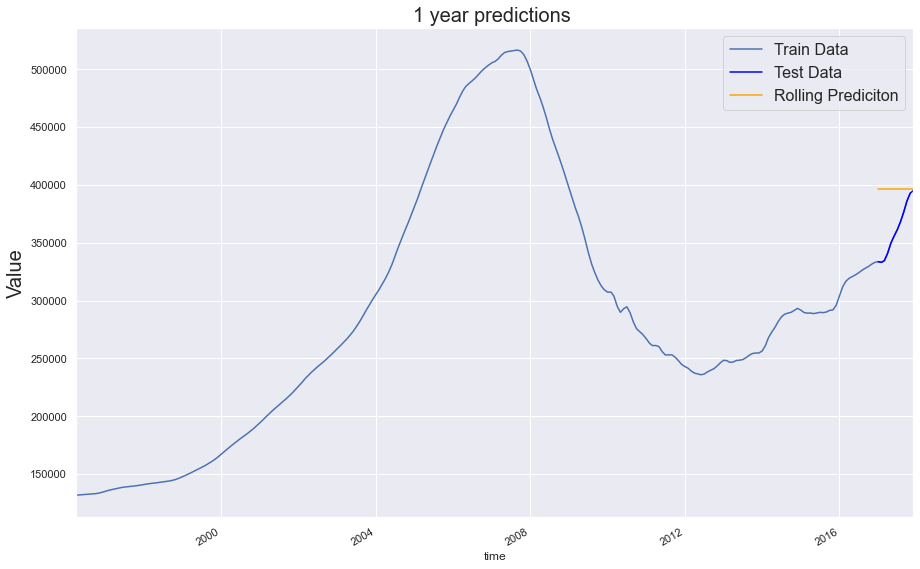

In [264]:
plt.figure(figsize=(10,4))


# Ploting the predicitons
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.lineplot(data = train_data_pred)

test_data_pred.plot(ax=ax, color='blue', legend=True)

fcast2.plot(ax=ax, color='orange', legend=True)

plt.legend(('Train Data', 'Test Data', 'Rolling Prediciton', 'fcast1'), fontsize=16)

plt.title('1 year predictions ', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [105]:
uc_zd
nb_zd
wh_zd
seca_zd

,value
time,
1997-01-01,187800.0
1997-02-01,188000.0
1997-03-01,188100.0
1997-04-01,188200.0
1997-05-01,188300.0
...,...
2017-08-01,467500.0
2017-09-01,473400.0
2017-10-01,479100.0


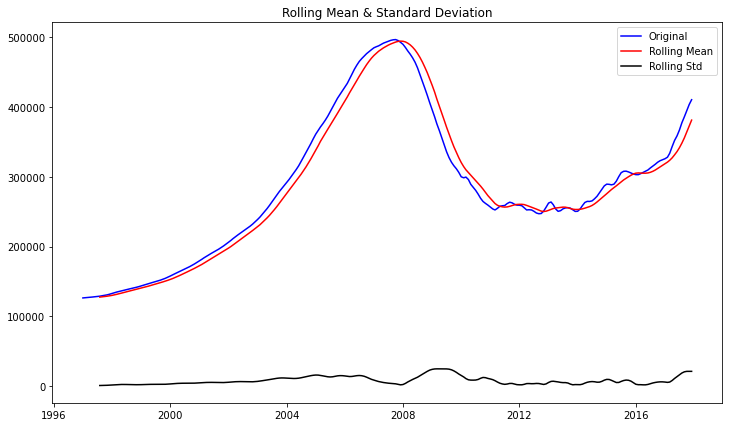

Results of the Dickey-Fuller Test: 

Test Statistic            -2.340044
p-value                    0.159378
#lags Used                15.000000
Number of Observation    236.000000
Critical Value (1%)       -3.458366
Critical Value (5%)       -2.873866
Critical Value (10%)      -2.573339
dtype: float64


In [106]:
stationarity_check(uc_zd)

In [107]:
uc_diff = uc_zd.diff()
uc_diff.isna().sum()
uc_diff.dropna(inplace=True)

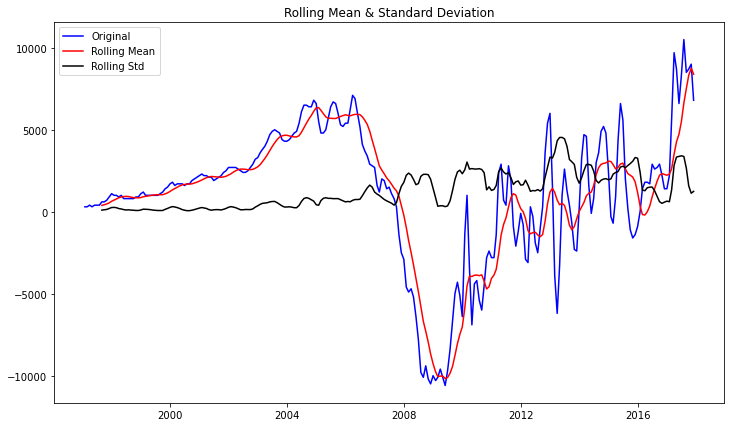

Results of the Dickey-Fuller Test: 

Test Statistic            -2.117033
p-value                    0.237721
#lags Used                16.000000
Number of Observation    234.000000
Critical Value (1%)       -3.458608
Critical Value (5%)       -2.873972
Critical Value (10%)      -2.573396
dtype: float64


In [108]:
stationarity_check(uc_diff)

In [109]:
uc_diff_2 = uc_zd.diff().diff()
uc_diff_2.isna().sum()
uc_diff_2.dropna(inplace=True)

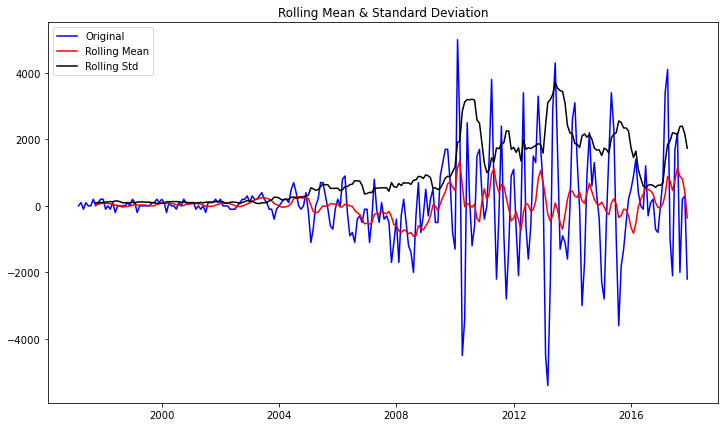

Results of the Dickey-Fuller Test: 

Test Statistic            -3.323977
p-value                    0.013840
#lags Used                15.000000
Number of Observation    234.000000
Critical Value (1%)       -3.458608
Critical Value (5%)       -2.873972
Critical Value (10%)      -2.573396
dtype: float64


In [110]:
stationarity_check(uc_diff_2)

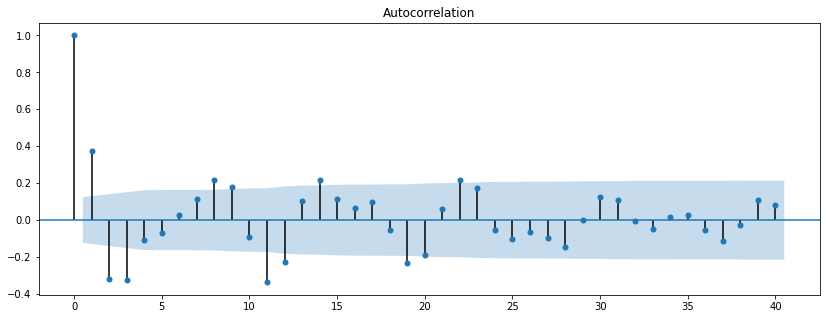

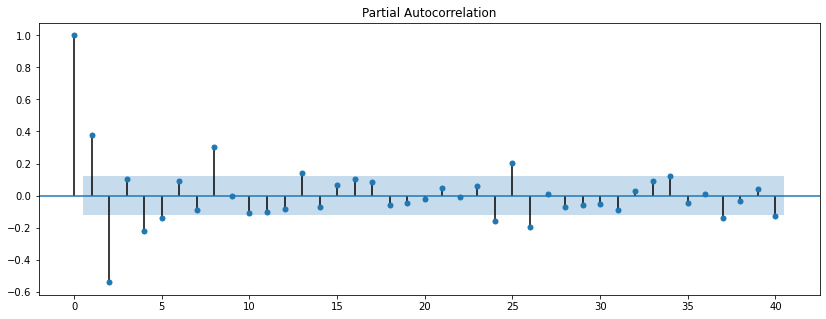

In [111]:
rcParams['figure.figsize'] = 14,5

plot_acf(uc_diff_2, lags=40);
plot_pacf(uc_diff_2, lags=40);

In [112]:
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

train_data = uc_zd[:train_end]
test_data = uc_zd[train_end + timedelta(days=1):test_end]

In [113]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = uc_zd[:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(0,2,1))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]
    

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

In [114]:
residuals_rolling = test_data['value'] - predictions_rolling

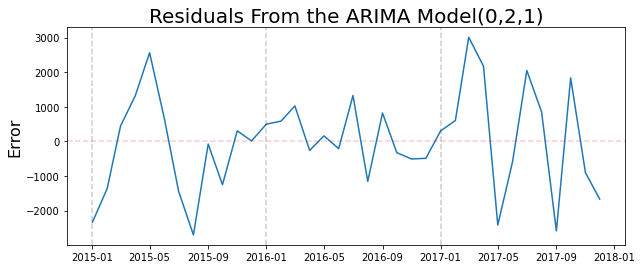

In [115]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(0,2,1)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Value')

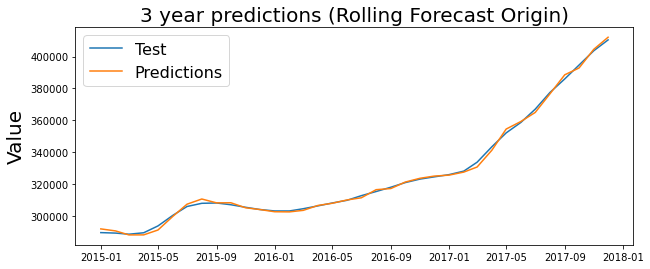

In [116]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test', 'Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [117]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data['value'])),4))

Mean Absolute Percent Error: 0.0035


In [118]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error: 1419.1277154468676


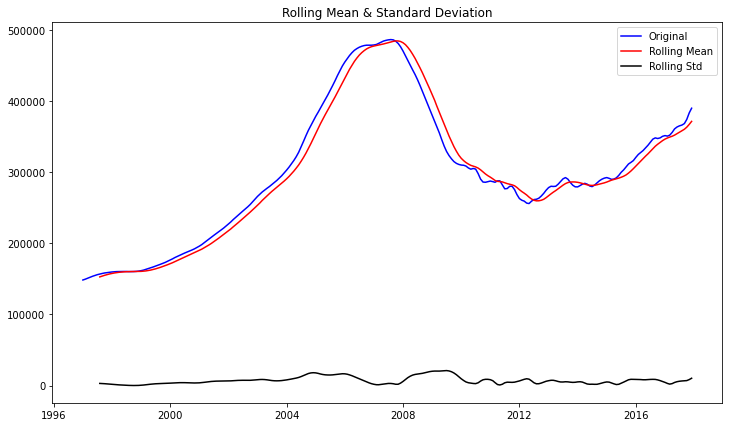

Results of the Dickey-Fuller Test: 

Test Statistic            -2.367056
p-value                    0.151251
#lags Used                16.000000
Number of Observation    235.000000
Critical Value (1%)       -3.458487
Critical Value (5%)       -2.873919
Critical Value (10%)      -2.573367
dtype: float64


In [119]:
stationarity_check(nb_zd)

In [161]:
nb_diff = nb_zd.diff()
nb_diff.isna().sum()
nb_diff.dropna(inplace=True)

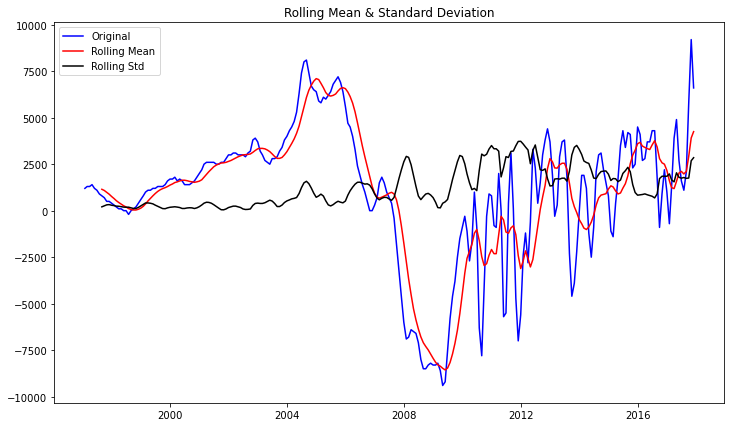

Results of the Dickey-Fuller Test: 

Test Statistic            -2.060780
p-value                    0.260575
#lags Used                16.000000
Number of Observation    234.000000
Critical Value (1%)       -3.458608
Critical Value (5%)       -2.873972
Critical Value (10%)      -2.573396
dtype: float64


In [162]:
stationarity_check(nb_diff)

In [163]:
nb_diff_2 = nb_zd.diff().diff()
nb_diff_2.isna().sum()
nb_diff_2.dropna(inplace=True)

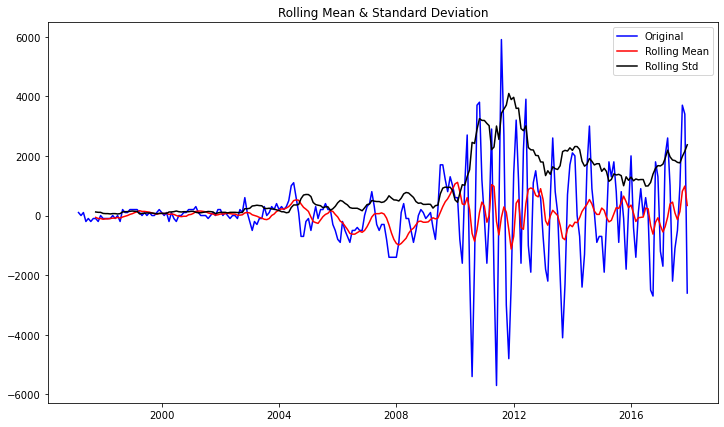

Results of the Dickey-Fuller Test: 

Test Statistic            -3.901153
p-value                    0.002026
#lags Used                16.000000
Number of Observation    233.000000
Critical Value (1%)       -3.458731
Critical Value (5%)       -2.874026
Critical Value (10%)      -2.573424
dtype: float64


In [164]:
stationarity_check(nb_diff_2)

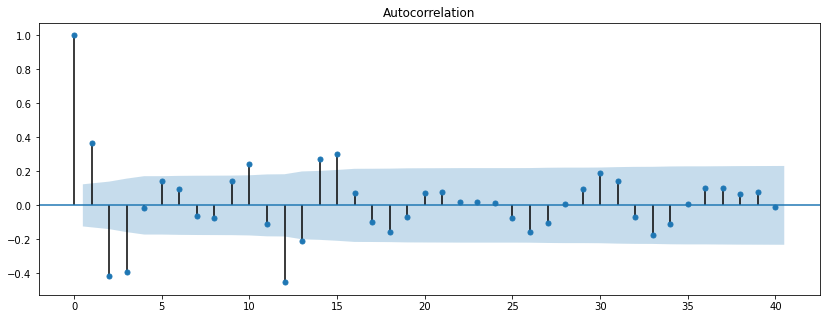

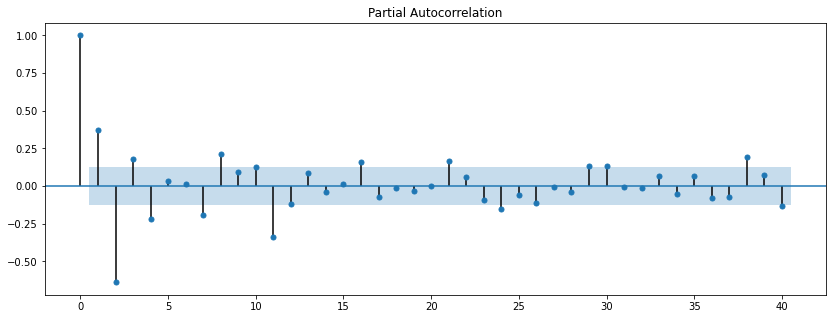

In [165]:
rcParams['figure.figsize'] = 14,5

plot_acf(nb_diff_2, lags=40);
plot_pacf(nb_diff_2, lags=40);

In [129]:
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

train_data = nb_zd[:train_end]
test_data = nb_zd[train_end + timedelta(days=1):test_end]

In [166]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = nb_zd[:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(0,2,0))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

In [167]:
residuals_rolling = test_data['value'] - predictions_rolling

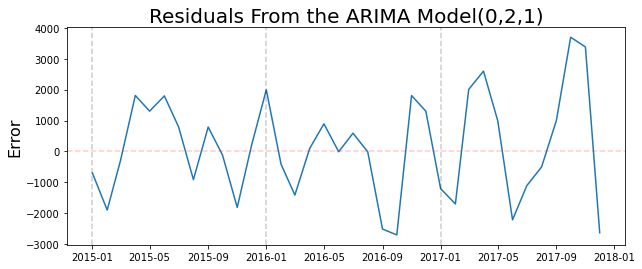

In [168]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(0,2,1)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Value')

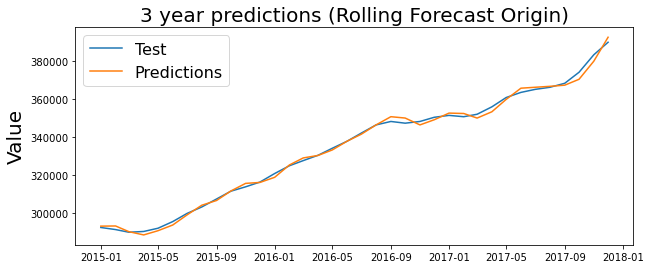

In [169]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test', 'Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [170]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data['value'])),4))

Mean Absolute Percent Error: 0.004


In [171]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error: 1660.080848181942


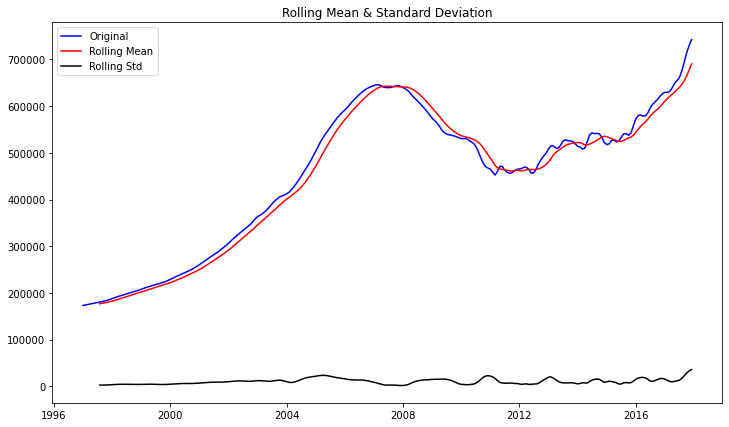

Results of the Dickey-Fuller Test: 

Test Statistic            -0.770982
p-value                    0.827498
#lags Used                15.000000
Number of Observation    236.000000
Critical Value (1%)       -3.458366
Critical Value (5%)       -2.873866
Critical Value (10%)      -2.573339
dtype: float64


In [122]:
stationarity_check(wh_zd)

In [172]:
wh_diff = wh_zd.diff()
wh_diff.isna().sum()
wh_diff.dropna(inplace=True)

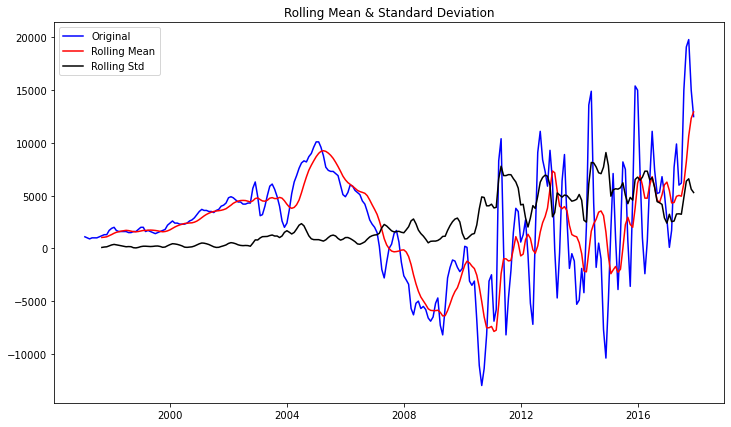

Results of the Dickey-Fuller Test: 

Test Statistic            -0.745631
p-value                    0.834574
#lags Used                16.000000
Number of Observation    234.000000
Critical Value (1%)       -3.458608
Critical Value (5%)       -2.873972
Critical Value (10%)      -2.573396
dtype: float64


In [173]:
stationarity_check(wh_diff)

In [174]:
wh_diff_2 = wh_zd.diff().diff()
wh_diff_2.isna().sum()
wh_diff_2.dropna(inplace=True)

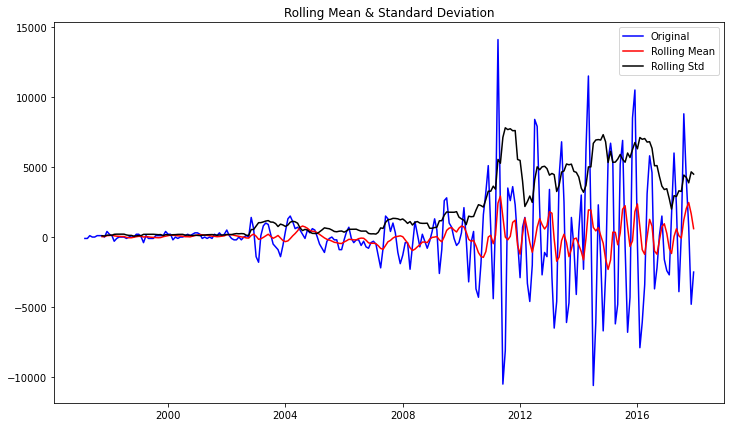

Results of the Dickey-Fuller Test: 

Test Statistic            -5.449751
p-value                    0.000003
#lags Used                15.000000
Number of Observation    234.000000
Critical Value (1%)       -3.458608
Critical Value (5%)       -2.873972
Critical Value (10%)      -2.573396
dtype: float64


In [175]:
stationarity_check(wh_diff_2)

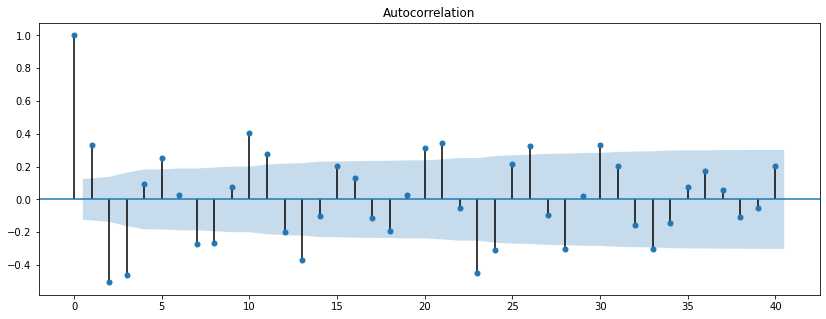

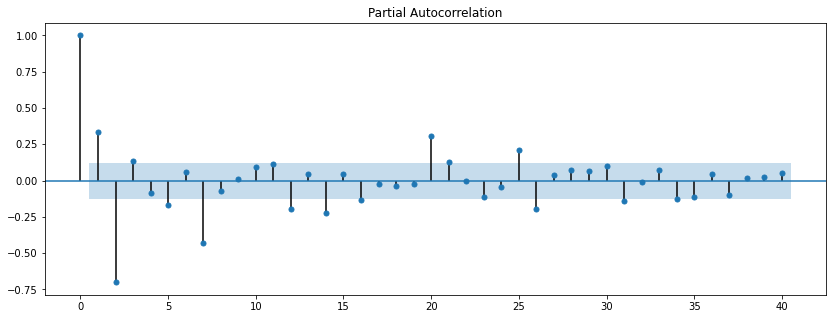

In [176]:
rcParams['figure.figsize'] = 14,5

plot_acf(wh_diff_2, lags=40);
plot_pacf(wh_diff_2, lags=40);

In [179]:
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

train_data = wh_zd[:train_end]
test_data = wh_zd[train_end + timedelta(days=1):test_end]

In [180]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = wh_zd[:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(0,2,1))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]
    

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

In [181]:
residuals_rolling = test_data['value'] - predictions_rolling

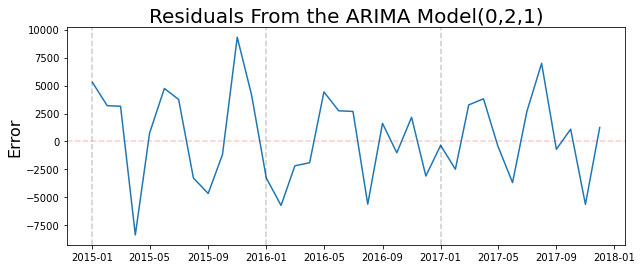

In [182]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(0,2,1)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Value')

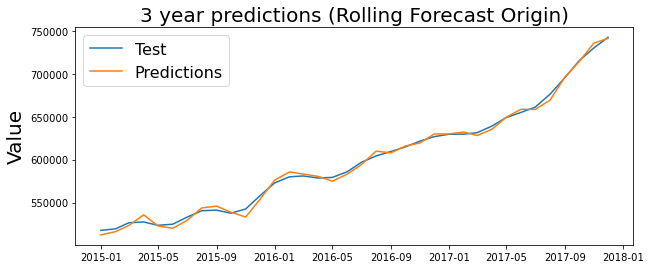

In [183]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test', 'Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [184]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data['value'])),4))

Mean Absolute Percent Error: 0.0057


In [185]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error: 3958.832948766943


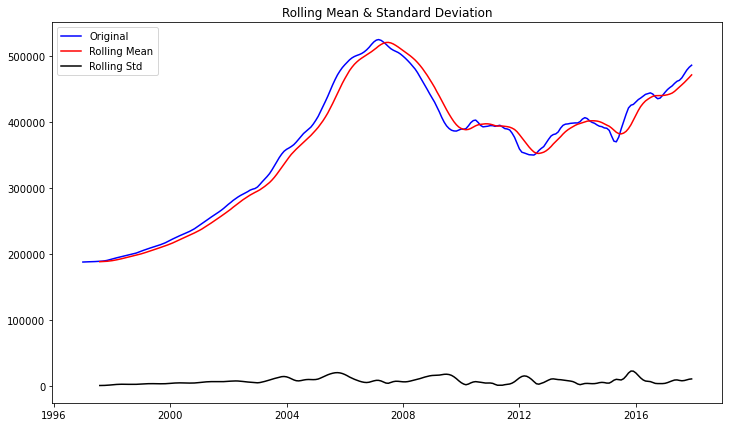

Results of the Dickey-Fuller Test: 

Test Statistic            -1.839274
p-value                    0.361145
#lags Used                16.000000
Number of Observation    235.000000
Critical Value (1%)       -3.458487
Critical Value (5%)       -2.873919
Critical Value (10%)      -2.573367
dtype: float64


In [123]:
stationarity_check(seca_zd)

In [186]:
seca_diff = seca_zd.diff()
seca_diff.isna().sum()
seca_diff.dropna(inplace=True)

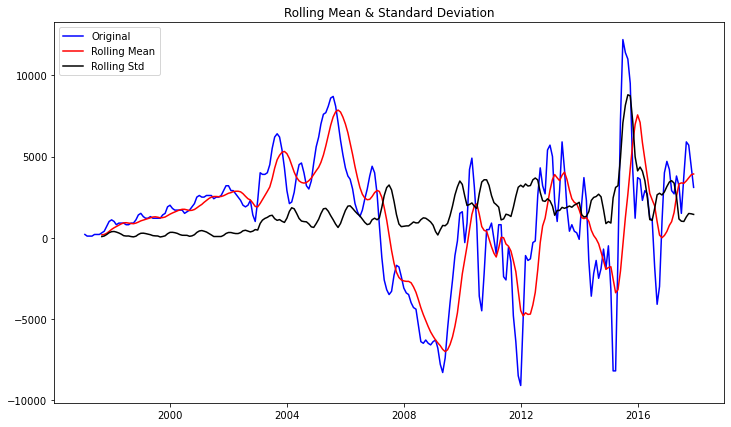

Results of the Dickey-Fuller Test: 

Test Statistic            -2.244504
p-value                    0.190491
#lags Used                15.000000
Number of Observation    235.000000
Critical Value (1%)       -3.458487
Critical Value (5%)       -2.873919
Critical Value (10%)      -2.573367
dtype: float64


In [187]:
stationarity_check(seca_diff)

In [189]:
seca_diff_2 = seca_zd.diff().diff()
seca_diff_2.isna().sum()
seca_diff_2.dropna(inplace=True)

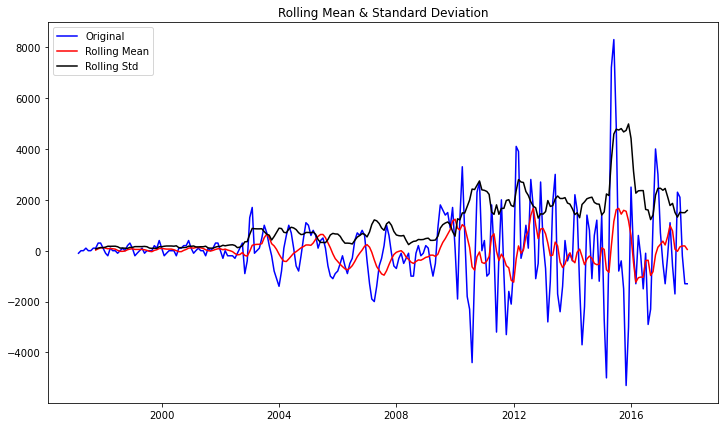

Results of the Dickey-Fuller Test: 

Test Statistic            -5.270038
p-value                    0.000006
#lags Used                14.000000
Number of Observation    235.000000
Critical Value (1%)       -3.458487
Critical Value (5%)       -2.873919
Critical Value (10%)      -2.573367
dtype: float64


In [190]:
stationarity_check(seca_diff_2)

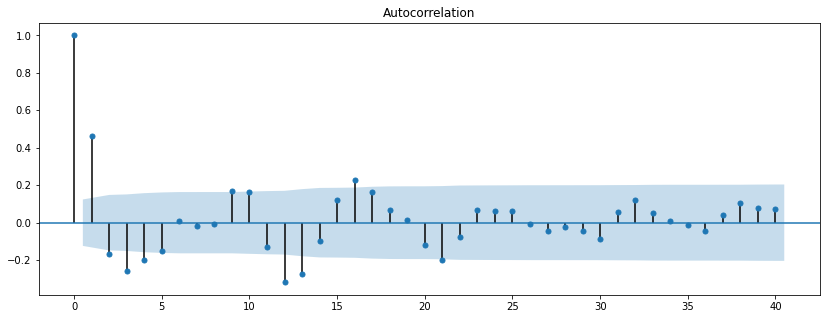

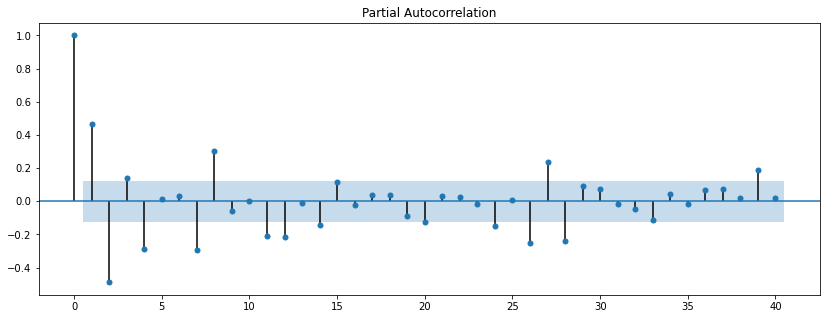

In [191]:
rcParams['figure.figsize'] = 14,5

plot_acf(seca_diff_2, lags=40);
plot_pacf(seca_diff_2, lags=40);

In [192]:
train_end = datetime(2014,12,1)
test_end = datetime(2017,12,1)

train_data = seca_zd[:train_end]
test_data = seca_zd[train_end + timedelta(days=1):test_end]

In [193]:
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data_pred = seca_zd[:end_date - timedelta(days=1)]
    model = ARIMA(train_data_pred, order=(0,2,1))
    model_fit = model.fit(disp=0)
    pred = model_fit.predict(end_date, typ='levels')
    predictions_rolling.loc[end_date] = pred.loc[end_date]
    

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided

In [194]:
residuals_rolling = test_data['value'] - predictions_rolling

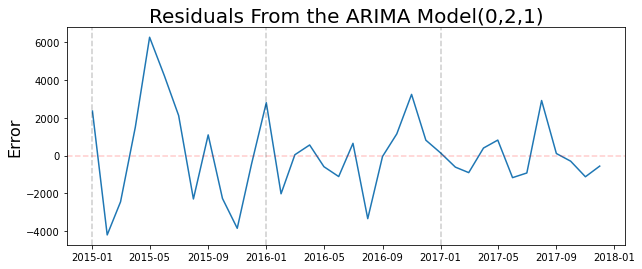

In [195]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals From the ARIMA Model(0,2,1)', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
for year in range(2015,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Value')

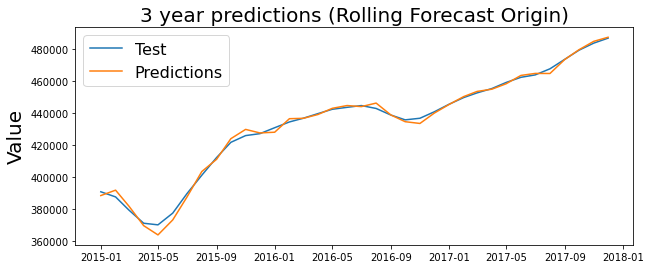

In [196]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Test', 'Predictions'), fontsize=16)

plt.title('3 year predictions (Rolling Forecast Origin)', fontsize=20)
plt.ylabel('Value', fontsize=20)

In [197]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling/test_data['value'])),4))

Mean Absolute Percent Error: 0.004


In [198]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error: 2187.909725042243


# Questions to ask
1. Why are we looking at the residuals after we perform decompose
2. How to understand what period to use when using differencing
3. Do you usually apply ewm when there is a trend up or downward with greater volume as a function of time 
4. When should you move foward with the made stationary data

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'RegionID'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

In [ ]:
###################### Running ARIMA on WNY ################################

# Step 6: Interpreting Results